# Assignment #1
Pedro Stramantinoli P. Cagliume Gomes 175955 <br/>
Ruy Castilho Barrichelo               177012

## Importação dos dados

In [62]:
import pandas as pd
import os

def load_diamond_data():
    csv_path = os.path.join("diamonds-dataset", "diamonds-train.csv")
    return pd.read_csv(csv_path)

def load_diamond_tests():
    csv_path = os.path.join("diamonds-dataset", "diamonds-test.csv")
    return pd.read_csv(csv_path)

## Feature Scaling e Normalização

In [2]:
import numpy as np

def normalize(train, test):
    train_mean = np.mean(train, axis=0)
    train = train - train_mean
    test = test - train_mean
    
    return train, test

def scale(X):
    max_array = np.max(X, axis=0)
    X = X / max_array[None, :]
    return X

    

## Dummy Coding

In [3]:
# dummy coding(cut,color,clarity)
from sklearn.preprocessing import LabelEncoder

def dummy(X):
    enumValues = {"cut": {"Fair":0, "Good":1, "Very Good":2, "Premium":3, "Ideal":4},
                  "color": {"J": 0, "I":1, "H":2, "G":3, "F":4, "E":5, "D":6},
                  "clarity": {"I1":0, "SI2":1, "SI1":2, "VS2":3, "VS1":4,"VVS2":5, "VVS1":6, "IF":7}}
    X.replace(enumValues, inplace=True)
    return X

## Geração de matrizes de Features e Target

## Setup inicial dos dados

In [63]:

import numpy as np

#Carrega os dados

diamond_data = load_diamond_data()
diamond_test = load_diamond_tests()
    
# Dummy Coding
diamond_data = dummy(diamond_data)
diamond_test = dummy(diamond_test)

# Separação em Features e Target
    
diamond_data_target = np.array(diamond_data["price"])
diamond_test_target = np.array(diamond_test["price"])
    
diamond_data = np.array(diamond_data)
diamond_test = np.array(diamond_test)

diamond_data_features = np.delete(diamond_data, -1, axis=1)

diamond_test_features = np.delete(diamond_test, -1, axis=1)

# Indices das colunas, considerando coluna de 1's adicionada
carat = 1
cut = 2
color = 3
clarity = 4
x = 5
y = 6
z = 7
depth = 8
table = 9
x2 = 10
y2 = 11
z2 = 12
carat2 = 13
y3 = 14
z3 = 15
y4 = 16
z4 = 17

# Inserindo novas features
diamond_data_features = np.hstack((diamond_data_features, np.square(diamond_data_features[:,[x]])))
diamond_data_features = np.hstack((diamond_data_features, np.square(diamond_data_features[:,[y]])))
diamond_data_features = np.hstack((diamond_data_features, np.square(diamond_data_features[:,[z]])))
diamond_data_features = np.hstack((diamond_data_features, np.square(diamond_data_features[:,[carat]])))
diamond_data_features = np.hstack((diamond_data_features, np.power(diamond_data_features[:,[y]], 3)))
diamond_data_features = np.hstack((diamond_data_features, np.power(diamond_data_features[:,[z]], 3)))
diamond_data_features = np.hstack((diamond_data_features, np.power(diamond_data_features[:,[y]], 4)))
diamond_data_features = np.hstack((diamond_data_features, np.power(diamond_data_features[:,[z]], 4)))

diamond_test_features = np.hstack((diamond_test_features, np.square(diamond_test_features[:,[x]])))
diamond_test_features = np.hstack((diamond_test_features, np.square(diamond_test_features[:,[y]])))
diamond_test_features = np.hstack((diamond_test_features, np.square(diamond_test_features[:,[z]])))
diamond_test_features = np.hstack((diamond_test_features, np.square(diamond_test_features[:,[carat]])))
diamond_test_features = np.hstack((diamond_test_features, np.power(diamond_test_features[:,[y]], 3)))
diamond_test_features = np.hstack((diamond_test_features, np.power(diamond_test_features[:,[z]], 3)))
diamond_test_features = np.hstack((diamond_test_features, np.power(diamond_test_features[:,[y]], 4)))
diamond_test_features = np.hstack((diamond_test_features, np.power(diamond_test_features[:,[z]], 4)))

# Normalização
normalized_diamond_data, normalized_diamond_test = normalize(diamond_data_features, diamond_test_features)

# Scaling
scaled_diamond_data = scale(normalized_diamond_data)
scaled_diamond_test = scale(normalized_diamond_test)

# # Scaling
# scaled_diamond_data = scale(diamond_data_features)
# scaled_diamond_test = scale(diamond_test_features)

# # Normalização
# normalized_diamond_data, normalized_diamond_test = normalize(scaled_diamond_data, scaled_diamond_test)

# Adicionando coluna de 1's

ready_diamond_data = np.c_[np.ones((len(scaled_diamond_data), 1)), scaled_diamond_data]
ready_diamond_test = np.c_[np.ones((len(scaled_diamond_test), 1)), scaled_diamond_test]

# ready_diamond_data = np.c_[np.ones((len(normalized_diamond_data), 1)), normalized_diamond_data]
# ready_diamond_test = np.c_[np.ones((len(normalized_diamond_test), 1)), normalized_diamond_test]

def getTrainSet():
    return ready_diamond_data, diamond_data_target

def getTestSet():
    return ready_diamond_test, diamond_test_target


## Equação Normal

In [5]:
# Normal Equation

def NormalEquation(X, y):

    transpose = X.T

    mult1 = transpose.dot(X)

    try:
        inverse = np.linalg.inv(mult1)

    except np.linalg.LinAlgError:
        print("Not invertible")
        return np.zeros(1,1)

    else:
        mult2 = (inverse.dot(transpose)).dot(y)
        return mult2


## Plots de Target em função de Features

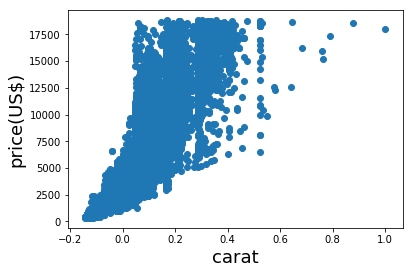

In [165]:
# #grafico Carat X Price
import matplotlib.pyplot as plt

plt.scatter(ready_diamond_data[:,[carat]], diamond_data_target.reshape(len(diamond_data_target), 1))
plt.xlabel("carat", fontsize=18)
plt.ylabel("price(US\$)", fontsize=18)
plt.show()

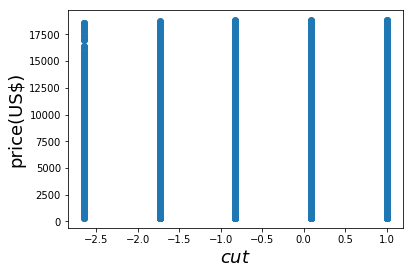

In [167]:
# #grafico Cut X Price
import matplotlib.pyplot as plt
plt.scatter(ready_diamond_data[:,[cut]], diamond_data_target.reshape(len(diamond_data_target), 1))
plt.xlabel("$cut$", fontsize=18)
plt.ylabel("price(US\$)", fontsize=18)
plt.show()

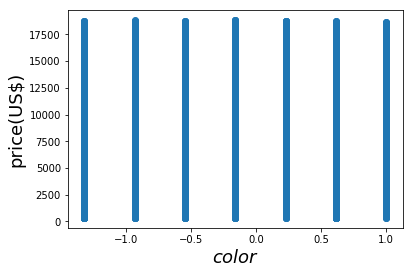

In [168]:
# #grafico  Color X Price
import matplotlib.pyplot as plt
plt.scatter(ready_diamond_data[:,[color]], diamond_data_target.reshape(len(diamond_data_target), 1))
plt.xlabel("$color$", fontsize=18)
plt.ylabel("price(US\$)", fontsize=18)
plt.show()

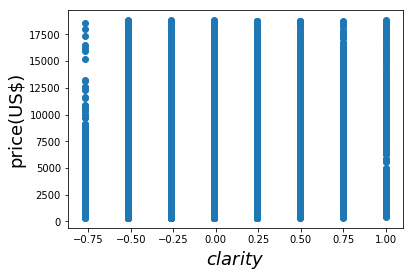

In [169]:
# #grafico Clarity X Price
import matplotlib.pyplot as plt
plt.scatter(ready_diamond_data[:,[clarity]], diamond_data_target.reshape(len(diamond_data_target), 1))
plt.xlabel("$clarity$", fontsize=18)
plt.ylabel("price(US\$)", fontsize=18)
plt.show()

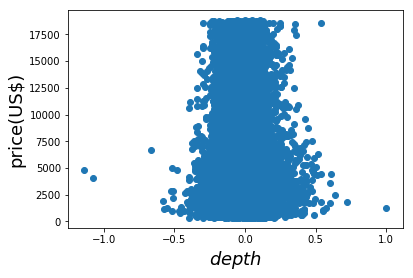

In [170]:
# #grafico Depth X Price
import matplotlib.pyplot as plt
plt.scatter(ready_diamond_data[:,[depth]], diamond_data_target.reshape(len(diamond_data_target), 1))
plt.xlabel("$depth$", fontsize=18)
plt.ylabel("price(US\$)", fontsize=18)
plt.show()

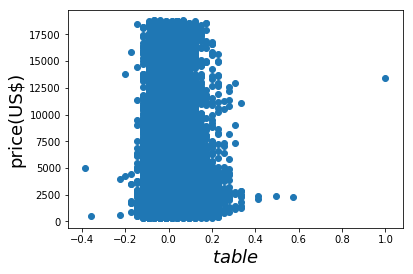

In [171]:
# #grafico table X Price
import matplotlib.pyplot as plt
plt.scatter(ready_diamond_data[:,[table]], diamond_data_target.reshape(len(diamond_data_target), 1))
plt.xlabel("$table$", fontsize=18)
plt.ylabel("price(US\$)", fontsize=18)
plt.show()

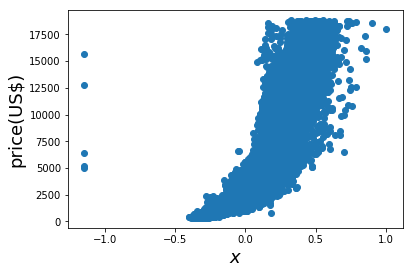

In [172]:
# #grafico x X Price
import matplotlib.pyplot as plt
plt.scatter(ready_diamond_data[:,[x]], diamond_data_target.reshape(len(diamond_data_target), 1))
plt.xlabel("$x$", fontsize=18)
plt.ylabel("price(US\$)", fontsize=18)
plt.show()

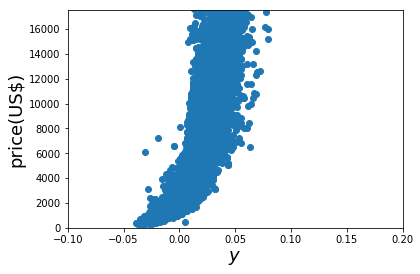

In [173]:
# #grafico y X Price
import matplotlib.pyplot as plt
plt.scatter(ready_diamond_data[:,[y]], diamond_data_target.reshape(len(diamond_data_target), 1))
plt.xlabel("$y$", fontsize=18)
plt.ylabel("price(US\$)", fontsize=18)
plt.axis([-.1, 0.2,0,17500])
plt.show()

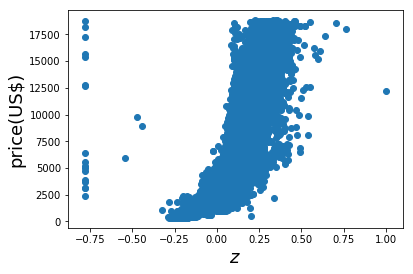

In [174]:
# #grafico z X Price
import matplotlib.pyplot as plt
plt.scatter(ready_diamond_data[:,[z]], diamond_data_target.reshape(len(diamond_data_target), 1))
plt.xlabel("$z$", fontsize=18)
plt.ylabel("price(US\$)", fontsize=18)
plt.show()

## Gerador de conjuntos de Cross Validation

In [15]:
# Cross Validation Generation

# PRECISA CHAMAR ISSO ANTES DE CHAMAR A FUNCAO --- 
#                             TRAINING_DATA = prepareSet(diamond_data) 

from sklearn.model_selection import train_test_split, KFold

# Retorna um gerador de indices
def generate_sets(TRAINING_DATA,type='kfold'):

    # Cross validation using train_test_split
    if (type == 'split'):
       return train_test_split(TRAINING_DATA,test_size=0.2,random_state=0)

    # Cross validation using K-Fold
    # K = 5, Shuffle = true, Seed = 21
    elif (type == 'kfold'):
        kfold_seed = 21

        kfold = KFold(n_splits=5, shuffle=True, random_state=kfold_seed)
        return kfold.split(TRAINING_DATA)

## Explicação do uso do generate_sets

In [16]:

# import numpy as np
# from sklearn.model_selection import train_test_split, KFold

# X = np.array([[10, 20], [30, 40], [50, 60], [70, 80], [90, 100], [110, 120], [130, 140], [150, 160], [170, 180], [190, 200]])
# y = np.array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

# #esse b vai ser um gerador, não precisa passar y pois ele gera somente os indices
# b = generate_sets(X)

# #precisa percorrer ele com 2 indices, um representa o treino, outro o test, 
# # na proxima iteracao ele ja vai estar num agrupamento diferente
# for train_index, val_index in b:
#     x_train = X[train_index]
#     y_train = y[train_index]
#     x_val = X[val_index]
#     y_val = y[val_index]
#     print(x_train, y_train)
#     print(x_val, y_val)
#     print("-----")
    


## Regressão Linear: Mini-batch

In [17]:
#implementation Linear Regression using Mini-Batch Gradient Descent
# def LinRegMiniGradientDescent(TRAIN_SET, TARGET_SET, N_ITERATION, LEARNING_RATE, SIZE_BATCH):
#     np.random.seed(42)
#     theta = np.random.randn(10,1) #random initialization
#     for iteration in range(N_ITERATIONS):
#         shuffle_indices = np.random.permutation(TRAIN_SET.shape[0])
#         train_shuffled = TRAIN_SET[shuffled_indices]
#         target_shuffled = TARGET_SET[shuffled_indices]
#         for i in range(0,TARGET_SET.shape[0], SIZE_BATCH):
#             xi = train_shuffled[i:i+SIZE_BATCH]
#             yi = target_shuffled[i:i+SIZE_BATCH]
#             gradients = 2/SIZE_BATCH * xi.T.dot(xi.dot(theta) - yi)
#             theta = theta - LEARNING_RATE * gradients
#     return theta

## Regressão Linear: Batch

In [18]:
import numpy as np
import random


def LinRegBatchGradientDescent(x, y, numIterations, learningRate, verbose=0):
    xTrans = x.transpose()
    theta = np.zeros((x.shape[1], 1)) * 0.01
    m = x.shape[0]
    y = y.reshape((y.shape[0],1))
    for i in range(numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        cost = (np.sum(loss ** 2)) / (2 * m)
        if verbose == 1:
            print ('cost on it', i, ':', cost)
        gradient = np.dot(xTrans, loss) / m
        theta = theta - learningRate * gradient
    return theta

## Regressão Linear: Batch + Custo por Iteração

In [122]:
import numpy as np
import random


def LinRegBatchGradientDescentCostPerIteraction(x, y, x_val, y_val, numIterations, learningRate, verbose=0):
    xTrans = x.transpose()
    theta = np.random.randn(x.shape[1],1) * 0.01 #random initialization
    m = x.shape[0]
    newNumInteraction = int(numIterations/10)
    cost = np.zeros((newNumInteraction,1))
    cost_validation = np.zeros((newNumInteraction,1))
    y = y.reshape(y.shape[0], 1)
    y_val = y_val.reshape(y_val.shape[0],1)
    for i in range(numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        gradient = np.dot(xTrans, loss) / m
        theta = theta - learningRate * gradient
        if i % 10 == 0 :
            index = int(i / 10);
            val_predict = np.dot(x_val, theta)
            loss_val = val_predict - y_val
            cost_validation[index] = np.sum(loss_val ** 2) / (2 * m)
            cost[index] = np.sum(loss ** 2) / (2 * m)
        if verbose == 1:
            print ('cost on it', i, ':', cost)
    return theta, cost, cost_validation

________________________________

# Modelos

### MODELO 1 : Modelo com todas as features, lineares, sem remoções

In [132]:
from sklearn.metrics import mean_squared_error

x1,y1 = getTrainSet()
x1 = x1[:, [0,carat,x,y,z,depth,table,color,cut,clarity]]
indices_generator = generate_sets(x1)
theta1 = np.zeros((5,x1.shape[1],1))
error1 = np.zeros((5,1))
error1_n = np.zeros((5,1)) 
i=0
for train_index, val_index in indices_generator:
    #dados de treino e de validacao
    x1_train = x1[train_index]
    y1_train = y1[train_index]
    x1_val = x1[val_index]
    y1_val = y1[val_index]
     
    theta1[i],cost, cost_val = LinRegBatchGradientDescentCostPerIteraction(x1_train,y1_train, x1_val, y1_val,500000,0.00001, verbose=0)
    thetaNormal = NormalEquation(x1_train,y1_train)
    
    #error from validation
    y1_predict = x1_val.dot(theta1[i])
    y1_n_predict = x1_val.dot(thetaNormal)
    error1[i] = mean_squared_error(y1_val, y1_predict)
    error1_n[i] = mean_squared_error(y1_val, y1_n_predict)/2
    i += 1




In [133]:
np.set_printoptions(precision=1)
for i in range(5):
    print("Iteracao ", i+1,)
    print("\tErro pelo Gradient Descent:", int(error1[i]) )
    print("\tErro pela Equacao Normal:   " , int(error1_n[i]) )

print("Media erros GD:", int(np.mean(error1)) )
print("Media erros EN: ", int(np.mean(error1_n)) )


Iteracao  1
	Erro pelo Gradient Descent: 8467384
	Erro pela Equacao Normal:    724963
Iteracao  2
	Erro pelo Gradient Descent: 8758233
	Erro pela Equacao Normal:    732478
Iteracao  3
	Erro pelo Gradient Descent: 9086912
	Erro pela Equacao Normal:    771709
Iteracao  4
	Erro pelo Gradient Descent: 8762734
	Erro pela Equacao Normal:    897075
Iteracao  5
	Erro pelo Gradient Descent: 8487302
	Erro pela Equacao Normal:    720242
Media erros GD: 8712513
Media erros EN:  769293


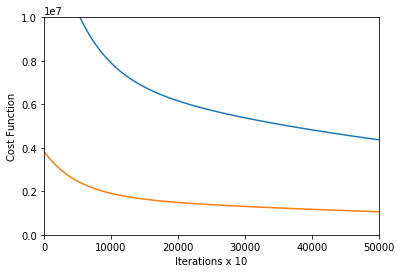

In [151]:
# import matplotlib.pyplot as plt
import numpy as pd
%matplotlib inline

plt.plot(range(cost.shape[0]) ,cost)
plt.plot(range(cost_val.shape[0]), cost_val)
plt.ylabel('Cost Function')
plt.xlabel('Iterations x 10')
plt.axis([0,50000,0,10000000])
plt.savefig('model1.png', bbox_inches='tight')
plt.show()

-------------------------------------------------------------------------------------------

### Modelo 2: Removidas as features que não aparentam influenciar o preço/target (table,depth,clarity,color,cut)

In [144]:
from sklearn.metrics import mean_squared_error

initial_x2,initial_y2 = getTrainSet()
initial_x2 = initial_x2[:, [0,x,y,z,carat]]
indices_generator = generate_sets(initial_x2)
theta2 = np.zeros((5,initial_x2.shape[1],1))
error2 = np.zeros((5,1))
error2_n = np.zeros((5,1)) 
i=0
for train_index, val_index in indices_generator:
    #dados de treino e de validacao
    x2_train = initial_x2[train_index]
    y2_train = initial_y2[train_index]
    x2_val = initial_x2[val_index]
    y2_val = initial_y2[val_index]
     
    theta2[i] = LinRegBatchGradientDescent(x2_train,y2_train,500000,0.0001)
    thetaNormal = NormalEquation(x2_train,y2_train)
    
    #error from validation
    y2_predict = x2_val.dot(theta2[i])
    y2_n_predict = x2_val.dot(thetaNormal)
    error2[i] = mean_squared_error(y2_val, y2_predict)
    error2_n[i] = mean_squared_error(y2_val, y2_n_predict)/2
    i += 1

In [145]:
np.set_printoptions(precision=1)
for i in range(5):
    print("Iteracao ", i+1,)
    print("\tErro pelo Gradient Descent:", int(error2[i]) )
    print("\tErro pela Equacao Normal:  " , int(error2_n[i]) )

print("Media erros GD:", int(np.mean(error2)) )
print("Media erros EN:", int(np.mean(error2_n)) )

Iteracao  1
	Erro pelo Gradient Descent: 3102206
	Erro pela Equacao Normal:   1109230
Iteracao  2
	Erro pelo Gradient Descent: 3176340
	Erro pela Equacao Normal:   1155806
Iteracao  3
	Erro pelo Gradient Descent: 3318291
	Erro pela Equacao Normal:   1188962
Iteracao  4
	Erro pelo Gradient Descent: 3218519
	Erro pela Equacao Normal:   1886008
Iteracao  5
	Erro pelo Gradient Descent: 3150639
	Erro pela Equacao Normal:   1141531
Media erros GD: 3193199
Media erros EN: 1296307


[0, 50000, 0, 10000000]

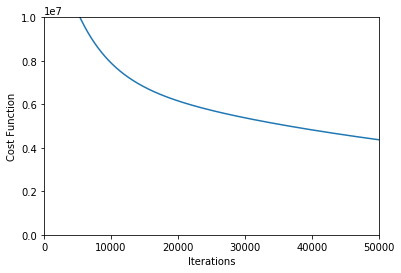

In [146]:
import matplotlib.pyplot as plt
import numpy as pd
%matplotlib inline

plt.plot(range(cost.shape[0]) ,cost)
plt.ylabel('Cost Function')
plt.xlabel('Iterations')
plt.axis([0,50000,0,10000000])


### Modelo 3 : Removidas as features que não aparentam influenciar no preço, com as restantes elevadas ao quadrado

In [149]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

initial_x3, initial_y3 = getTrainSet()
initial_x3 = initial_x3[:, [0, x, y, z, x2, y2, z2, carat2]]

indices_generator = generate_sets(initial_x3)
theta3 = np.zeros((5,initial_x3.shape[1],1))
error3 = np.zeros((5,1))
error3_n = np.zeros((5,1)) 
i=0
for train_index, val_index in indices_generator:
    #dados de treino e de validacao
    x3_train = initial_x3[train_index]
    y3_train = initial_y3[train_index]
    x3_val = initial_x3[val_index]
    y3_val = initial_y3[val_index]
    
    theta3[i] = LinRegBatchGradientDescent(x3_train,y3_train,500000,0.00001)
    thetaNormal = NormalEquation(x3_train,y3_train)

    # error from validation
    y3_predict = x3_val.dot(theta3[i])
    y3_n_predict = x3_val.dot(thetaNormal)
    error3[i] = mean_squared_error(y3_val, y3_predict)
    error3_n[i] = mean_squared_error(y3_val, y3_n_predict)/2
    i += 1

In [152]:
np.set_printoptions(precision=1)
for i in range(5):
    print("Iteracao ", i+1,)
    print("\tErro pelo Gradient Descent:", int(error3[i]) )
    print("\tErro pela Equacao Normal:  " , int(error3_n[i]) )

print("Media erros GD:", int(np.mean(error3)) )
print("Media erros EN:", int(np.mean(error3_n)) )

Iteracao  1
	Erro pelo Gradient Descent: 8664567
	Erro pela Equacao Normal:   1127047
Iteracao  2
	Erro pelo Gradient Descent: 8875717
	Erro pela Equacao Normal:   1125787
Iteracao  3
	Erro pelo Gradient Descent: 9242535
	Erro pela Equacao Normal:   1137736
Iteracao  4
	Erro pelo Gradient Descent: 8928808
	Erro pela Equacao Normal:   356197568
Iteracao  5
	Erro pelo Gradient Descent: 8597337
	Erro pela Equacao Normal:   1124735
Media erros GD: 8861793
Media erros EN: 72142575


### Modelo 4: Features sem influência aparente em graus lineares, features restantes elevadas ao quadrado

In [153]:
from sklearn.metrics import mean_squared_error

initial_x4,initial_y4 = getTrainSet()
initial_x4 = initial_x4[:, [0, x, y, z, table, depth, clarity, color, cut, carat, x2, y2, z2, carat2]]

indices_generator = generate_sets(initial_x4)
theta4 = np.zeros((5,initial_x4.shape[1],1))
error4 = np.zeros((5,1))
error4_n = np.zeros((5,1)) 
i=0
for train_index, val_index in indices_generator:
    #dados de treino e de validacao
    x4_train = initial_x4[train_index]
    y4_train = initial_y4[train_index]
    x4_val = initial_x4[val_index]
    y4_val = initial_y4[val_index]
     
    theta4[i] = LinRegBatchGradientDescent(x4_train,y4_train,300000,0.0001)
    thetaNormal = NormalEquation(x4_train,y4_train)
    
    #error from validation
    y4_predict = x4_val.dot(theta4[i])
    y4_n_predict = x4_val.dot(thetaNormal)
    error4[i] = mean_squared_error(y4_val, y4_predict)
    error4_n[i] = mean_squared_error(y4_val, y4_n_predict)/2
    i += 1

In [154]:
np.set_printoptions(precision=1)
for i in range(5):
    print("Iteracao ", i+1,)
    print("\tErro pelo Gradient Descent:", int(error4[i]) )
    print("\tErro pela Equacao Normal:  " , int(error4_n[i]) )

print("Media erros GD:", int(np.mean(error4)) )
print("Media erros EN:", int(np.mean(error4_n)) )

Iteracao  1
	Erro pelo Gradient Descent: 2473815
	Erro pela Equacao Normal:   723311
Iteracao  2
	Erro pelo Gradient Descent: 2493478
	Erro pela Equacao Normal:   723502
Iteracao  3
	Erro pelo Gradient Descent: 2694872
	Erro pela Equacao Normal:   756568
Iteracao  4
	Erro pelo Gradient Descent: 2538688
	Erro pela Equacao Normal:   346579200
Iteracao  5
	Erro pelo Gradient Descent: 2448685
	Erro pela Equacao Normal:   713384
Media erros GD: 2529907
Media erros EN: 69899193


### Modelo 5: Features sem influência aparente em graus lineares, features restantes com graus superlineares acima de 2 

In [230]:
from sklearn.metrics import mean_squared_error

initial_x5,y5 = getTrainSet()
x5 = initial_x5[:, [0, x, y, z, table, depth, clarity, color, cut, carat, x2, y2, z2, carat2, y3, z3, y4, z4 ]]

indices_generator = generate_sets(x5)
theta5 = np.zeros((5,x5.shape[1],1))
error5 = np.zeros((5,1))
error5_n = np.zeros((5,1)) 
i=0
for train_index, val_index in indices_generator:
    #dados de treino e de validacao
    x5_train = x5[train_index]
    y5_train = y5[train_index]
    x5_val = x5[val_index]
    y5_val = y5[val_index]
     
    theta5[i], cost, cost_val = LinRegBatchGradientDescentCostPerIteraction(x5_train,y5_train, x5_val, y5_val, 500000,0.0001)
    thetaNormal = NormalEquation(x5_train,y5_train)
    
    #error from validation
    y5_predict = x5_val.dot(theta5[i])
    y5_n_predict = x5_val.dot(thetaNormal)
    error5[i] = mean_squared_error(y5_val, y5_predict)
    error5_n[i] = mean_squared_error(y5_val, y5_n_predict)/2
    i += 1

[0, 40000, 0, 10000000]

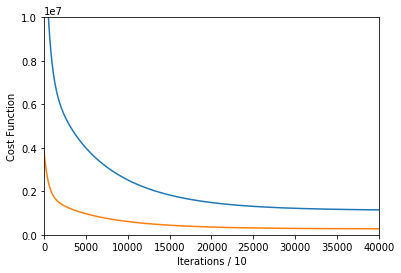

In [236]:
import matplotlib.pyplot as plt
import numpy as pd
%matplotlib inline

plt.plot(range(cost.shape[0]) ,cost)
plt.plot(range(cost_val.shape[0]), cost_val)
plt.ylabel('Cost Function')
plt.xlabel('Iterations / 10')
plt.axis([0,40000,0,10000000])

In [233]:
np.set_printoptions(precision=5)
print(theta5)

[[[3937.4205 ]
  [8188.17702]
  [ 765.71187]
  [5485.76745]
  [ 180.50802]
  [-136.71394]
  [1832.59917]
  [ 589.06687]
  [ 471.65213]
  [4883.49055]
  [ 151.09163]
  [3886.32633]
  [-126.37231]
  [-368.43335]
  [2625.07261]
  [-116.23091]
  [1716.39981]
  [-106.46308]]

 [[3933.99295]
  [8166.50581]
  [ 765.61625]
  [5435.76946]
  [ 180.51836]
  [-140.05384]
  [1804.62806]
  [ 567.69862]
  [ 467.9431 ]
  [4881.56771]
  [ 151.14853]
  [3864.60643]
  [-129.22093]
  [-370.90575]
  [2613.52382]
  [-118.66893]
  [1709.80346]
  [-108.52185]]

 [[3927.17775]
  [8162.81382]
  [ 765.15271]
  [5446.94918]
  [ 173.57587]
  [-128.49398]
  [1816.83803]
  [ 575.5636 ]
  [ 448.32805]
  [4847.74331]
  [ 150.58359]
  [3858.34405]
  [-118.95407]
  [-351.37845]
  [2605.75168]
  [-109.54786]
  [1703.66828]
  [-100.38959]]

 [[3927.83178]
  [8163.0632 ]
  [ 771.35664]
  [5457.83216]
  [ 162.95119]
  [-127.62088]
  [1798.03126]
  [ 577.66683]
  [ 480.57504]
  [4880.4418 ]
  [ 157.06402]
  [3877.6211 ]
  [-

In [234]:
np.set_printoptions(precision=1)
for i in range(5):
    print("Iteracao ", i+1,)
    print("\tErro pelo Gradient Descent:", int(error5[i]) )
    print("\tErro pela Equacao Normal:  " , int(error5_n[i]) )

print("Media erros GD:", int(np.mean(error5)) )
print("Media erros EN:", int(np.mean(error5_n)) )

Iteracao  1
	Erro pelo Gradient Descent: 2247458
	Erro pela Equacao Normal:   656820
Iteracao  2
	Erro pelo Gradient Descent: 2228047
	Erro pela Equacao Normal:   669912
Iteracao  3
	Erro pelo Gradient Descent: 2417883
	Erro pela Equacao Normal:   665399
Iteracao  4
	Erro pelo Gradient Descent: 2289713
	Erro pela Equacao Normal:   137274727
Iteracao  5
	Erro pelo Gradient Descent: 2210115
	Erro pela Equacao Normal:   650203
Media erros GD: 2278643
Media erros EN: 27983412


In [ ]:
# theta_test_aux = theta5
# cost5 = cost
# cost5_val = cost_val

# print(cost5_val)

# Teste

In [256]:
from sklearn.metrics import mean_squared_error

initial_x_test,y_test = getTestSet()
x_test = initial_x_test[:, [0, x, y, z, table, depth, clarity, color, cut, carat, x2, y2, z2, carat2, y3, z3, y4, z4 ]]

theta_test = np.mean(theta5, axis=0)

y_test_predict = x_test.dot(theta_test)
y_test_n_predict = x_test.dot(thetaNormal)
# print(y_test.shape)
error_test = mean_squared_error(y_test, y_test_predict)
error_test_n = mean_squared_error(y_test, y_test_n_predict)/2


In [257]:
np.set_printoptions(precision=1)
print("\tErro pelo Gradient Descent:", int(error_test) )
print("\tErro pela Equacao Normal:  " , int(error_test_n) )

print("Media erros GD:", int(np.mean(error_test)) )
print("Media erros EN:", int(np.mean(error_test_n)) )

	Erro pelo Gradient Descent: 3380401
	Erro pela Equacao Normal:   7939853
Media erros GD: 3380401
Media erros EN: 7939853


In [260]:
# Usando scikit-learn

sgd_reg = SGDRegressor(max_iter=500000, penalty=None, eta0=0.0001, verbose=0, learning_rate='constant')
sgd_reg.fit(x5, y5)

prediction = sgd_reg.predict(x_test)


In [261]:
prediction

array([2948.7, 5753.3, 6534.5, ..., 1990.3, 1348.6, 1070.1])

In [262]:
error_scikit = mean_squared_error(y_test, prediction)
print(error_scikit)

2004407.1266561996
